#### random sample of  silver records

In [1]:
from zoomtools import solr, rdb, transform

%matplotlib inline

In [4]:
ss4 = solr.conn('solarstage04')

http://solarstage04.xoominfo.com:8983/solr/zoomCollection


In [5]:
query_args = {'fl': 'id,d_email_address',
              'sort': 'random_1234 desc',
              'rows': 1000}

sample = solr.query(ss4, 'has_email:T (has_title:F OR has_company_id:F)', query_args)
sample.head(2)

,id,d_email_address
0,-1803342057,josh@greenbaydistillery.com
1,-2058661621,dgbtech@waikato.ac.nz


#### collecting validation data from the permission pass db

In [6]:
ppdb = rdb.conn(driver=rdb.drivers()[4],
                server='Freshdb03',
                database='permission_pass_db',
                uid='sa')

Password for user sa:
········
Connected to permission_pass_db on Freshdb03.


In [7]:
email_string = transform.emails_to_sql(sample['d_email_address'])
query = """ select *
            from emails
            where email in ({})
        """.format(email_string)

validation = rdb.query(ppdb, query)
validation.head(2)

,email,pp_status_code,date_sent_to_vendor,date_processed,reference_id,date_validated,date_permission_passed,date_added
0,200650172@student.qu.edu.qa,4,2016-06-11 09:00:00.143,2016-06-26 04:33:42.380,376008206,2016-06-12 00:00:00,2016-06-12,2016-06-04 17:39:59.613
1,43884@ngrid.sa,4,2015-11-07 09:00:00.107,2015-11-24 01:30:01.013,308924679,2016-03-17 13:54:04,2015-11-11,2015-10-31 03:23:49.727


#### visualizing distribution of date_validated dates

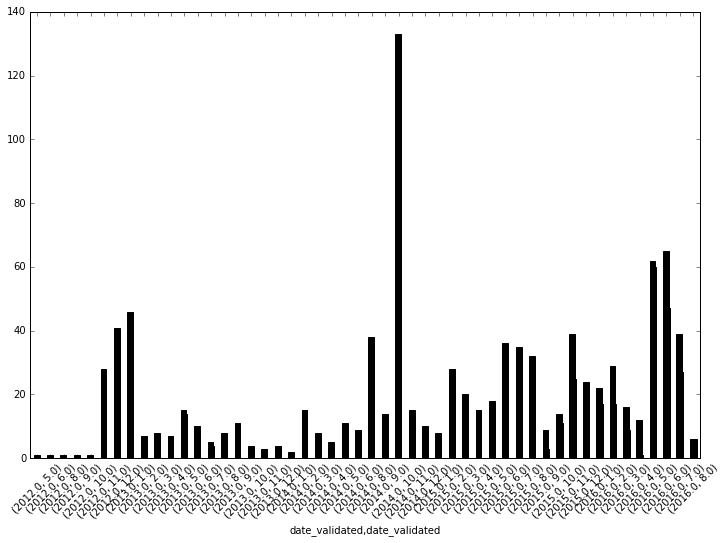

In [6]:
validation.groupby((validation.date_validated.dt.year, 
                    validation.date_validated.dt.month)).count().plot(kind="bar", 
                                                                      legend=False,
                                                                      rot=45,
                                                                      figsize=(12, 8))

#### sadness

In [7]:
validation['pp_status_code'].value_counts()

4     958
11     40
Name: pp_status_code, dtype: int64

In [8]:
validation[validation['date_validated'] < '2016-05'].shape

(819, 8)